### Using Python (and R) for Finance 

**Sanjiv R Das**

### Installing Python

In this notebook we will get started with using Python for financial computation. You first need to download and install IPython which is an entire system for interactive use of Python. Luckily, this is easily done by visiting the following URL and downloading the version applicable to your machine (Python runs on all platforms). 

Visit Continuum Analytics and download Python: http://continuum.io/downloads and install it. Test that it works by using the Launcher (which will be on your desktop) to start up the IPython Notebook. Use the latest version of Python. 



Particularly useful are linear algebra capabilities in Python and R. In Python the package numPy makes these facile. Also useful are graphical libraries, and in Python, these comes in the matplotlib package. 

In [3]:
#Invoke numPy and matplotlib in one command
#This is needed to bring all the math libraries into memory for immediate use.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/srdas/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Using R

*Not essential*:  
You may also install the R programming language, which is a very useful tool for Machine Learning. 
See: http://en.wikipedia.org/wiki/Machine_learning
Get R from: http://www.r-project.org/ (download and install it). 

In order to allow Python to interface with R, you also need to install the "rpy2" package from: http://rpy.sourceforge.net/
While you do not need to use R, and can get by mostly with Python, it is also a useful language as there are heaps of finance packages in R. As you will see, we can run both within the IPython Notebook. (Indeed, these lecture notes have been prepared in the Notebook.)

If you want to use R in IDE mode, download RStudio: http://www.rstudio.com/

In [4]:
#IMPORTING STOCK DATA USING THE PANDAS MODULE
#Install the pandas_datareader module using "pip install pandas-datareader"
#See: https://github.com/pydata/pandas-datareader

from datetime import datetime
import pandas_datareader.data as web
goog = web.DataReader("GOOG",  "yahoo", datetime(2015,4,1), datetime(2017,3,31))

stkp = goog["Adj Close"]
print(stkp.head())

Date
2015-04-01    542.562439
2015-04-02    535.532417
2015-04-06    536.767432
2015-04-07    537.022404
2015-04-08    541.612446
Name: Adj Close, dtype: float64


In [5]:
### Display the top of the data frame. 

goog.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-01,548.602502,551.142488,539.502472,542.562439,1963000,542.562439
2015-04-02,540.852427,540.852427,533.849395,535.532417,1716300,535.532417
2015-04-06,532.222436,538.412447,529.572407,536.767432,1324400,536.767432
2015-04-07,538.082440,542.692434,536.002456,537.022404,1302800,537.022404
2015-04-08,538.382457,543.852476,538.382457,541.612446,1178500,541.612446


In [6]:
### Diaplay row names, i.e., dates. 

goog.index

DatetimeIndex(['2015-04-01', '2015-04-02', '2015-04-06', '2015-04-07',
               '2015-04-08', '2015-04-09', '2015-04-10', '2015-04-13',
               '2015-04-14', '2015-04-15',
               ...
               '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23',
               '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29',
               '2017-03-30', '2017-03-31'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

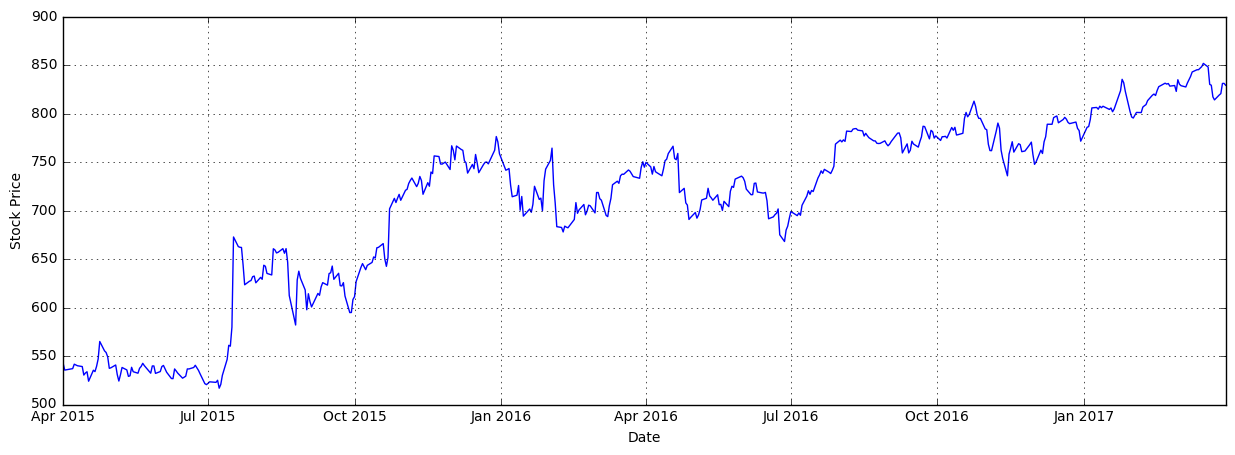

In [7]:
##PLOT THE STOCK PRICE OVER TIME
rcParams['figure.figsize'] = 15,5

t = goog.index
plot(t,stkp)
xlabel("Date")
ylabel("Stock Price")
grid()

In [8]:
### Range is an array, not a matrix

for j in range(3):
    print(j)

0
1
2


504


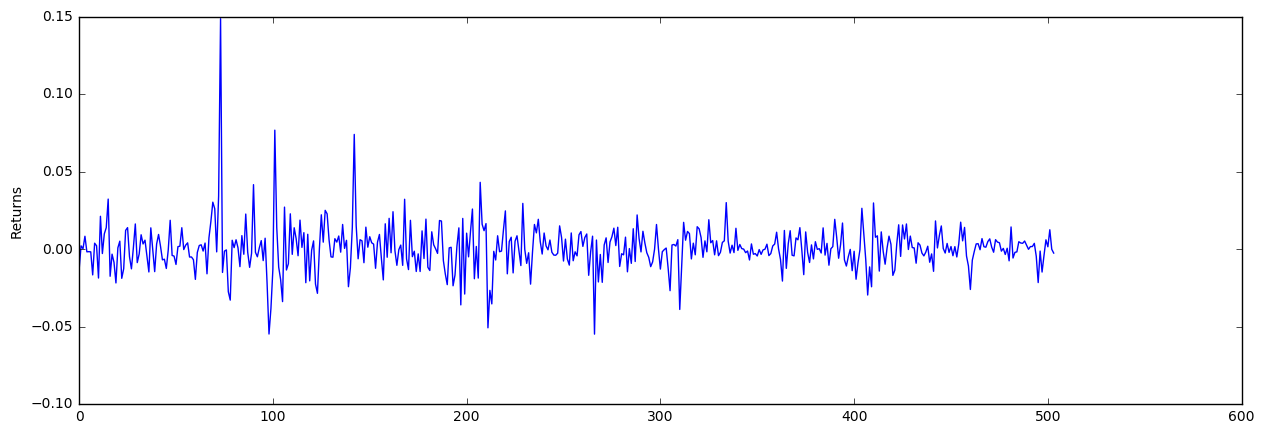

In [9]:
### PLOT RETURNS (contunuously compounded)

n = len(t)-1
print(n)
rets = zeros(n)
for j in range(n):
    rets[j] = log(stkp[j+1]/stkp[j])
plot(rets)
ylabel("Returns")

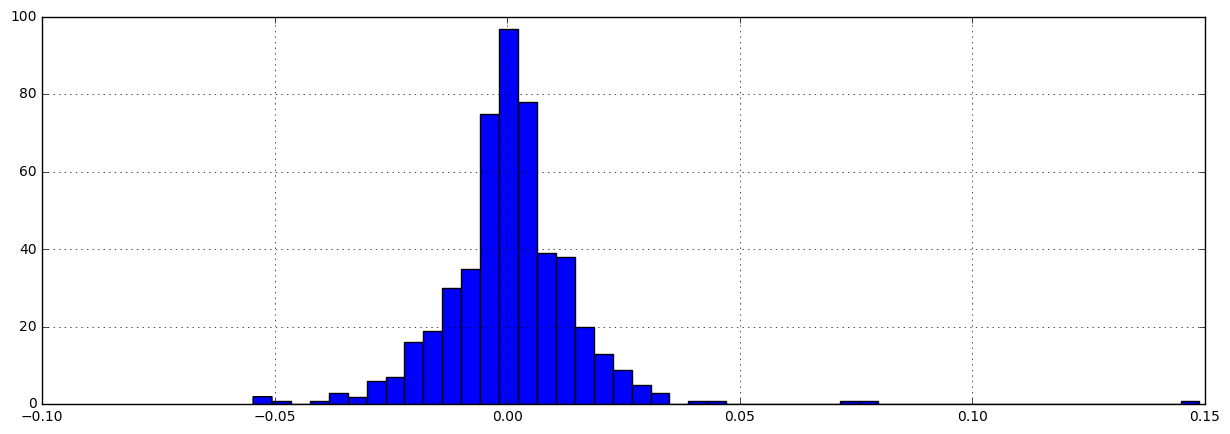

In [10]:
### Examine the distribution of returns visually using a histogram.

hist(rets,50)
grid()

In [11]:
### Summary Statistics

goog.describe()

,Open,High,Low,Close,Volume,Adj Close
count,505.000000,505.000000,505.000000,505.000000,5.050000e+02,505.000000
mean,707.536789,712.987836,701.546274,707.443666,1.887166e+06,707.443666
std,89.926724,89.849600,89.963386,89.946689,1.006034e+06,89.946689
min,519.500000,522.734009,515.179993,516.830017,5.272000e+05,516.830017
25%,654.150024,659.854980,644.010010,651.159973,1.301300e+06,651.159973
50%,729.169983,734.710022,721.900024,728.580017,1.632700e+06,728.580017
75%,773.780029,778.710022,768.530029,772.559998,2.129500e+06,772.559998
max,851.609985,853.500000,847.109985,852.119995,1.116490e+07,852.119995


In [12]:
### Calculate the Higher-Order Moments

import scipy.stats as ss
print("Skewness = ",ss.skew(rets))
print("Kurtosis = ",ss.kurtosis(rets))

#CHECK IF THIS IS EXCESS KURTOSIS or PLAIN KURTOSIS
x = randn(1000000)
print("Kurtosis for standard normal = ",ss.kurtosis(x))

Skewness =  2.029468240420415
Kurtosis =  20.61596222043168
Kurtosis for standard normal =  -0.0009966812870843


### Sharing variables between Python and R

In [13]:
#SENDING DATA VARIABLES TO R
%load_ext rpy2.ipython
#THIS ALLOWS US TO USE R INSIDE THE NOTEBOOK

In [14]:
#SENDS DATA FROM PYTHON TO R
%Rpush stkp       

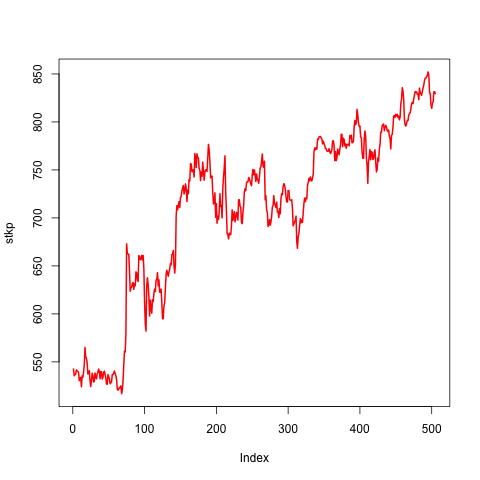

In [15]:
### Using R inside the Python notebook

#PREFIX NEEDED TO CALL R INSTEAD OF PYTHON
%R plot(stkp,type="l",col="red",lwd=2)   

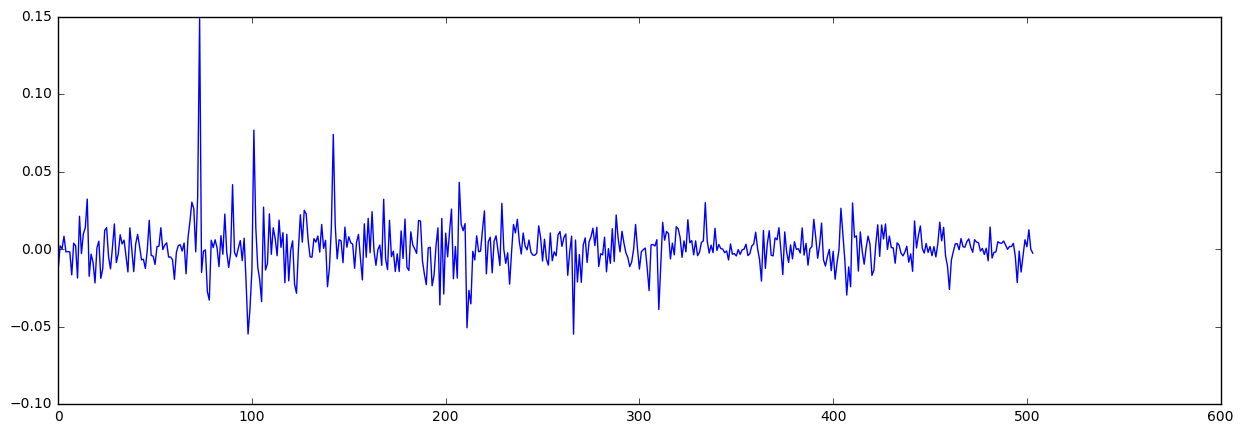

In [16]:
#GETTING DATA BACK FROM R TO PYTHON

%R ret = diff(log(stkp))
#GET DATA BACK FROM R TO PYTHON
ret = %Rget ret   
plot(ret)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.0546400 -0.0050990  0.0004559  0.0008424  0.0071080  0.1489000 


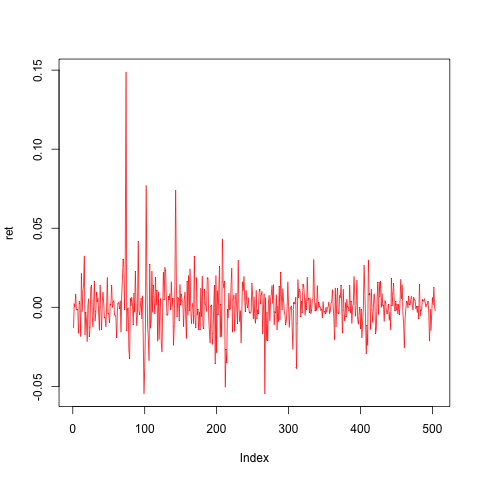

In [17]:
### Examine the data in the R namespace

%R print(summary(ret))
%R plot(ret,type="l",col="red")

### Getting stock data from R into Python

In [18]:
%%R
library(quantmod)
getSymbols(c("C","AAPL","CSCO","YHOO","IBM"))

/Users/srdas/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: xts

  warnings.warn(x, RRuntimeWarning)
/Users/srdas/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: zoo

  warnings.warn(x, RRuntimeWarning)
/Users/srdas/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘zoo’


  warnings.warn(x, RRuntimeWarning)
/Users/srdas/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


  warnings.warn(x, RRuntimeWarning)
/Users/srdas/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: TTR

  warnings.warn(x, RRuntimeWarning)
/Users/srdas/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Version 0.4-0

[1] "C"    "AAPL" "CSCO" "YHOO" "IBM" 


In [19]:
%%R 
### The entire code block is R

citi = as.matrix(C$C.Adjusted)
aapl = as.matrix(AAPL$AAPL.Adjusted)
csco = as.matrix(CSCO$CSCO.Adjusted)
yhoo = as.matrix(YHOO$YHOO.Adjusted)
ibm = as.matrix(IBM$IBM.Adjusted)

In [20]:
%%R 
stkdata = data.frame(cbind(citi,aapl,csco,yhoo,ibm))
rn = rownames(stkdata)
head(stkdata)

           C.Adjusted AAPL.Adjusted CSCO.Adjusted YHOO.Adjusted IBM.Adjusted
2007-01-03   490.2917      10.85709      23.32460         25.61     77.73997
2007-01-04   488.6056      11.09807      23.93863         26.85     78.57116
2007-01-05   486.0321      11.01904      23.94704         27.74     77.85985
2007-01-08   488.5169      11.07345      24.08162         27.92     79.04270
2007-01-09   484.2573      11.99333      23.94704         27.58     79.97778
2007-01-10   480.3527      12.56728      24.12368         28.70     79.03470


In [21]:
### Now bring this data frame from R back into Python

stkdata = %Rget stkdata
rn = %Rget rn

In [22]:
stkdata.head()

,C.Adjusted,AAPL.Adjusted,CSCO.Adjusted,YHOO.Adjusted,IBM.Adjusted
2007-01-03,490.291686,10.857091,23.324601,25.610001,77.739967
2007-01-04,488.605593,11.098071,23.938627,26.850000,78.571155
2007-01-05,486.032149,11.019039,23.947039,27.740000,77.859851
2007-01-08,488.516874,11.073455,24.081620,27.920000,79.042697
2007-01-09,484.257338,11.993328,23.947039,27.580000,79.977781


In [23]:
rn

array(['2007-01-03', '2007-01-04', '2007-01-05', ..., '2017-04-07',
       '2017-04-10', '2017-04-11'], 
      dtype='<U10')

### Pandas is Awesome

This is a useful book to have: 
http://www3.canisius.edu/~yany/python/Python4DataAnalysis.pdf

In [24]:
import pandas as pd
stk = pd.DataFrame(stkdata)
#stk = stk.T
stk.head()

,C.Adjusted,AAPL.Adjusted,CSCO.Adjusted,YHOO.Adjusted,IBM.Adjusted
2007-01-03,490.291686,10.857091,23.324601,25.610001,77.739967
2007-01-04,488.605593,11.098071,23.938627,26.850000,78.571155
2007-01-05,486.032149,11.019039,23.947039,27.740000,77.859851
2007-01-08,488.516874,11.073455,24.081620,27.920000,79.042697
2007-01-09,484.257338,11.993328,23.947039,27.580000,79.977781


In [25]:
### RENAME COLUMNS OF A DATAFRAME

stk.columns=["C","AAPL","CSCO","YHOO","IBM"]
stk.index = rn
stk.head()

,C,AAPL,CSCO,YHOO,IBM
2007-01-03,490.291686,10.857091,23.324601,25.610001,77.739967
2007-01-04,488.605593,11.098071,23.938627,26.850000,78.571155
2007-01-05,486.032149,11.019039,23.947039,27.740000,77.859851
2007-01-08,488.516874,11.073455,24.081620,27.920000,79.042697
2007-01-09,484.257338,11.993328,23.947039,27.580000,79.977781


In [26]:
### PULL ONE ROW 

stk.ix['2007-01-03']

C       490.291686
AAPL     10.857091
CSCO     23.324601
YHOO     25.610001
IBM      77.739967
Name: 2007-01-03, dtype: float64

In [27]:
stk.ix['2007-01-03']["AAPL"]

10.857091

In [28]:
### ADD A COLUMN TO THE DATAFRAME

stk["extra"] = 1.0
stk.head()

,C,AAPL,CSCO,YHOO,IBM,extra
2007-01-03,490.291686,10.857091,23.324601,25.610001,77.739967,1.0
2007-01-04,488.605593,11.098071,23.938627,26.850000,78.571155,1.0
2007-01-05,486.032149,11.019039,23.947039,27.740000,77.859851,1.0
2007-01-08,488.516874,11.073455,24.081620,27.920000,79.042697,1.0
2007-01-09,484.257338,11.993328,23.947039,27.580000,79.977781,1.0


In [29]:
### Extract a column and sort it 

sort(stk["AAPL"])

array([  10.131557,   10.428248,   10.666638, ...,  144.020004,
        144.119995,  144.770004])

In [30]:
stk.head()

,C,AAPL,CSCO,YHOO,IBM,extra
2007-01-03,490.291686,10.857091,23.324601,25.610001,77.739967,1.0
2007-01-04,488.605593,11.098071,23.938627,26.850000,78.571155,1.0
2007-01-05,486.032149,11.019039,23.947039,27.740000,77.859851,1.0
2007-01-08,488.516874,11.073455,24.081620,27.920000,79.042697,1.0
2007-01-09,484.257338,11.993328,23.947039,27.580000,79.977781,1.0


In [31]:
### HOW TO REMOVE A COLUMN FROM THE DATAFRAME

stk = stk.drop("extra",axis=1)  #IF AXIS=0 (default), THEN ROW IS DROPPED
stk.head()

,C,AAPL,CSCO,YHOO,IBM
2007-01-03,490.291686,10.857091,23.324601,25.610001,77.739967
2007-01-04,488.605593,11.098071,23.938627,26.850000,78.571155
2007-01-05,486.032149,11.019039,23.947039,27.740000,77.859851
2007-01-08,488.516874,11.073455,24.081620,27.920000,79.042697
2007-01-09,484.257338,11.993328,23.947039,27.580000,79.977781


In [32]:
### SUBSET THE DATAFRAME

stk[["AAPL","IBM"]].head()

,AAPL,IBM
2007-01-03,10.857091,77.739967
2007-01-04,11.098071,78.571155
2007-01-05,11.019039,77.859851
2007-01-08,11.073455,79.042697
2007-01-09,11.993328,79.977781


In [33]:
### FILTER THE DATAFRAME

stk[stk["AAPL"]<11]

,C,AAPL,CSCO,YHOO,IBM
2007-01-03,490.291686,10.857091,23.324601,25.610001,77.739967
2007-02-01,490.481449,10.978876,22.365711,28.350000,79.122617
2007-02-02,489.854110,10.980172,22.828333,28.770000,79.258483
2007-02-05,490.660697,10.875229,23.139553,28.559999,80.225536
2007-02-06,492.453065,10.902436,22.946093,29.350000,79.801952
2007-02-09,478.562214,10.788424,23.307778,29.740000,79.000330
2007-02-12,478.831058,10.997015,23.164787,29.170000,79.024377
2007-02-13,481.340362,10.973694,22.861979,29.559999,78.791905
2007-02-16,484.835501,10.990537,23.147964,31.910000,79.353041
2007-02-27,453.469064,10.873933,21.625513,30.950001,75.320859


In [34]:
### FILTER ON ONE COLUMN AND DISPLAY ANOTHER

stk[stk["AAPL"]<11]["IBM"]

2007-01-03    77.739967
2007-02-01    79.122617
2007-02-02    79.258483
2007-02-05    80.225536
2007-02-06    79.801952
2007-02-09    79.000330
2007-02-12    79.024377
2007-02-13    78.791905
2007-02-16    79.353041
2007-02-27    75.320859
2007-02-28    74.503202
2008-11-20    59.160213
2008-11-21    61.749606
2009-01-15    69.369354
2009-01-16    70.029068
2009-01-20    67.604609
2009-01-21    75.389277
2009-03-09    69.216088
Name: IBM, dtype: float64

In [35]:
### APPLY A CONDITION TO ALL CELLS

(stk < 50).head()

,C,AAPL,CSCO,YHOO,IBM
2007-01-03,False,True,True,True,False
2007-01-04,False,True,True,True,False
2007-01-05,False,True,True,True,False
2007-01-08,False,True,True,True,False
2007-01-09,False,True,True,True,False


In [36]:
### COLUMN SUMS

sum(stk)

C       243923.562306
AAPL    154928.446792
CSCO     54142.569339
YHOO     67190.669958
IBM     347485.570201
dtype: float64

### Lambda Functions

In [37]:
### USING FUNCTIONS ON DATA FRAMES
f = lambda x: x.max() - x.min()
stk.apply(f)

C       489.652060
AAPL    134.638447
CSCO     22.686348
YHOO     43.419999
IBM     132.924541
dtype: float64

### Apply Methods in Pandas

In [38]:
def g(x):
    return pd.Series([x.mean(),x.std(),x.min(),x.max()], index=['mean','stdev','min','max'])
stk.apply(g)

,C,AAPL,CSCO,YHOO,IBM
mean,94.288196,59.887301,20.928709,25.972428,134.319896
stdev,121.539473,37.080531,4.929342,10.887920,35.223335
min,10.010486,10.131557,11.456223,8.950000,59.160213
max,499.662546,144.770004,34.142571,52.369999,192.084754


In [39]:
### SORT ON ROW INDEXES

print(stk.head())
stk.sort_index(axis=0,ascending=False).head()

                     C       AAPL       CSCO       YHOO        IBM
2007-01-03  490.291686  10.857091  23.324601  25.610001  77.739967
2007-01-04  488.605593  11.098071  23.938627  26.850000  78.571155
2007-01-05  486.032149  11.019039  23.947039  27.740000  77.859851
2007-01-08  488.516874  11.073455  24.081620  27.920000  79.042697
2007-01-09  484.257338  11.993328  23.947039  27.580000  79.977781


,C,AAPL,CSCO,YHOO,IBM
2017-04-11,59.029999,141.630005,32.919998,46.790001,170.580002
2017-04-10,59.279999,143.169998,33.009998,47.209999,171.199997
2017-04-07,59.430000,143.339996,32.959999,46.439999,172.139999
2017-04-06,59.889999,143.660004,33.080002,46.279999,172.449997
2017-04-05,59.590000,144.020004,33.000000,46.380001,172.880005


In [40]:
### SORT ON COLUMN HEADERS

print(stk.head())
stk.sort_index(axis=1,ascending=False).head()

                     C       AAPL       CSCO       YHOO        IBM
2007-01-03  490.291686  10.857091  23.324601  25.610001  77.739967
2007-01-04  488.605593  11.098071  23.938627  26.850000  78.571155
2007-01-05  486.032149  11.019039  23.947039  27.740000  77.859851
2007-01-08  488.516874  11.073455  24.081620  27.920000  79.042697
2007-01-09  484.257338  11.993328  23.947039  27.580000  79.977781


,YHOO,IBM,CSCO,C,AAPL
2007-01-03,25.610001,77.739967,23.324601,490.291686,10.857091
2007-01-04,26.850000,78.571155,23.938627,488.605593,11.098071
2007-01-05,27.740000,77.859851,23.947039,486.032149,11.019039
2007-01-08,27.920000,79.042697,24.081620,488.516874,11.073455
2007-01-09,27.580000,79.977781,23.947039,484.257338,11.993328


In [41]:
### SUM COLUMNS

stk.sum()

C       243923.562306
AAPL    154928.446792
CSCO     54142.569339
YHOO     67190.669958
IBM     347485.570201
dtype: float64

In [42]:
### AVERAGE OF COLUMNS

stk.mean()

C        94.288196
AAPL     59.887301
CSCO     20.928709
YHOO     25.972428
IBM     134.319896
dtype: float64

In [43]:
### FIRST DIFFERENCE THE DATA

stk.diff().head()

,C,AAPL,CSCO,YHOO,IBM
2007-01-03,NaN,NaN,NaN,NaN,NaN
2007-01-04,-1.686093,0.240980,0.614026,1.239999,0.831188
2007-01-05,-2.573444,-0.079032,0.008412,0.890000,-0.711304
2007-01-08,2.484725,0.054416,0.134581,0.180000,1.182846
2007-01-09,-4.259536,0.919873,-0.134581,-0.340000,0.935084


In [44]:
### COMPUTE PERCENTAGE DAILY RETURN

stk.pct_change().head()

,C,AAPL,CSCO,YHOO,IBM
2007-01-03,NaN,NaN,NaN,NaN,NaN
2007-01-04,-0.003439,0.022196,0.026325,0.048419,0.010692
2007-01-05,-0.005267,-0.007121,0.000351,0.033147,-0.009053
2007-01-08,0.005112,0.004938,0.005620,0.006489,0.015192
2007-01-09,-0.008719,0.083070,-0.005589,-0.012178,0.011830


### Annualize Return Mean and Standard Deviation 

In [45]:
### Annualize Mean
stk.pct_change().mean()*252.0

C      -0.020820
AAPL    0.303566
CSCO    0.078331
YHOO    0.134582
IBM     0.101417
dtype: float64

In [46]:
### Annualize SD
stk.pct_change().std()*sqrt(252.0)

C       0.612722
AAPL    0.325599
CSCO    0.298761
YHOO    0.395032
IBM     0.222804
dtype: float64

In [47]:
### CORRELATION MATRIX

rets = stk.pct_change()
rets.corr()

,C,AAPL,CSCO,YHOO,IBM
C,1.000000,0.379307,0.466045,0.332190,0.440316
AAPL,0.379307,1.000000,0.485689,0.345683,0.475700
CSCO,0.466045,0.485689,1.000000,0.406527,0.573215
YHOO,0.332190,0.345683,0.406527,1.000000,0.376407
IBM,0.440316,0.475700,0.573215,0.376407,1.000000


In [48]:
rets.corrwith(rets.AAPL)

C       0.379307
AAPL    1.000000
CSCO    0.485689
YHOO    0.345683
IBM     0.475700
dtype: float64

In [49]:
### COVARIANCE MATRIX

rets.cov()

,C,AAPL,CSCO,YHOO,IBM
C,0.001490,0.000300,0.000339,0.000319,0.000239
AAPL,0.000300,0.000421,0.000187,0.000176,0.000137
CSCO,0.000339,0.000187,0.000354,0.000190,0.000151
YHOO,0.000319,0.000176,0.000190,0.000619,0.000131
IBM,0.000239,0.000137,0.000151,0.000131,0.000197


In [50]:
sqrt(diag(rets.cov())*252.0)

array([ 0.61272233,  0.32559883,  0.29876119,  0.39503197,  0.22280442])

### Stacking up Data in Panels

In [51]:
from datetime import datetime
import pandas_datareader.data as web
panel = pd.Panel(dict((stock, web.DataReader(stock,"yahoo",datetime(2015,4,1),
                                             datetime(2017,3,31))) 
                      for stock in ['C','AAPL','CSCO','YHOO','IBM']))
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 505 (major_axis) x 6 (minor_axis)
Items axis: AAPL to YHOO
Major_axis axis: 2015-04-01 00:00:00 to 2017-03-31 00:00:00
Minor_axis axis: Open to Adj Close

In [52]:
### RE-ARRANGE DIMENSIONS

panel = panel.swapaxes('items','minor')
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 505 (major_axis) x 5 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2015-04-01 00:00:00 to 2017-03-31 00:00:00
Minor_axis axis: AAPL to YHOO

In [53]:
panel['Adj Close'].head()

,AAPL,C,CSCO,IBM,YHOO
Date,,,,,
2015-04-01,119.463174,50.862668,25.481584,148.356652,44.130001
2015-04-02,120.491951,51.099149,25.369371,149.540303,44.150002
2015-04-06,122.443743,50.862668,25.453531,151.022188,43.669998
2015-04-07,121.155371,50.764137,25.612498,151.050162,43.610001
2015-04-08,120.761163,51.128707,25.762115,150.845119,45.169998


In [54]:
### EXTRACT A SINGLE ELEMENT OF THE MIDDLE DIMENSION

panel.ix[:,'2015-04-06',:]

,Open,High,Low,Close,Volume,Adj Close
AAPL,124.470001,127.510002,124.330002,127.349998,37194000.0,122.443743
C,51.160000,51.959999,50.980000,51.619999,13250800.0,50.862668
CSCO,26.959999,27.320000,26.840000,27.219999,20004000.0,25.453531
IBM,159.690002,162.800003,158.699997,162.039993,3465700.0,151.022188
YHOO,43.820000,44.029999,43.610001,43.669998,10717000.0,43.669998


### Reading Data from Files

In [55]:
import pandas as pd
data = pd.read_table("markowitzdata.txt")

In [56]:
data.head()

,DATE,SUNW,MSFT,IBM,CSCO,AMZN,mktrf,smb,hml,rf
0,20010102,-0.087444,0.000000,-0.002206,-0.129085,-0.108434,-0.0345,-0.0037,0.0209,0.00026
1,20010103,0.297297,0.105187,0.115696,0.240150,0.265766,0.0527,0.0097,-0.0493,0.00026
2,20010104,-0.060606,0.010430,-0.015192,0.013616,-0.117438,-0.0121,0.0083,-0.0015,0.00026
3,20010105,-0.096774,0.014194,0.008719,-0.125373,-0.060484,-0.0291,0.0027,0.0242,0.00026
4,20010108,0.006696,-0.003817,-0.004654,-0.002133,0.025751,-0.0037,-0.0053,0.0129,0.00026


In [57]:
### ANOTHER EXAMPLE

gdata = pd.read_csv("goog.csv")

In [58]:
gdata.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2011-04-06,572.18,575.16,568.00,574.18,2668300,574.18
1,2011-04-05,581.08,581.49,565.68,569.09,6047500,569.09
2,2011-04-04,593.00,594.74,583.10,587.68,2054500,587.68
3,2011-04-01,588.76,595.19,588.76,591.80,2613200,591.80
4,2011-03-31,583.00,588.16,581.74,586.76,2029400,586.76


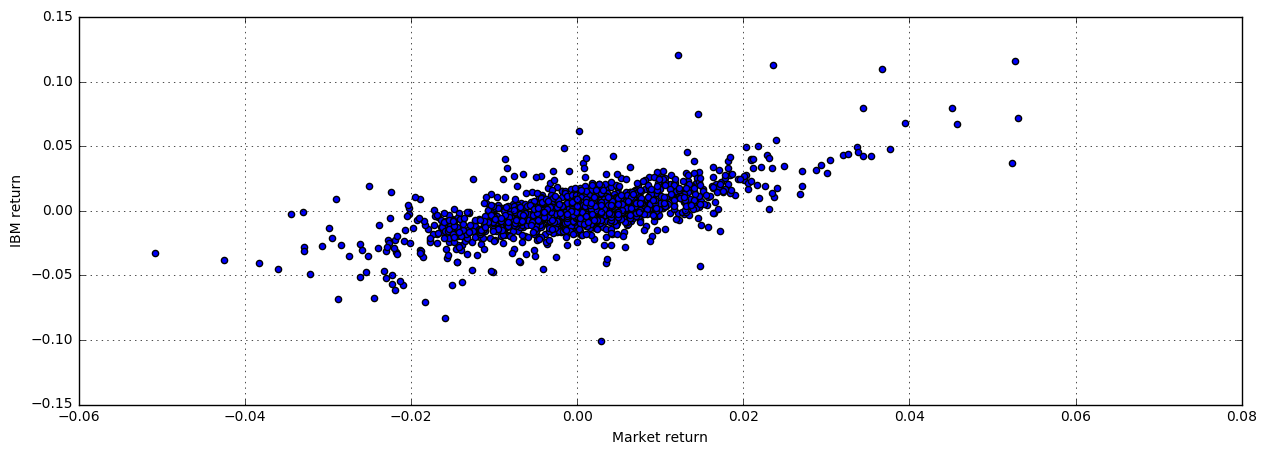

In [59]:
### HOW IS STOCK RETURN RELATED TO THAT OF THE MARKET?

scatter(data["mktrf"],data["IBM"])
xlabel("Market return")
ylabel("IBM return")
grid(True)

In [60]:
### RUN A REGRESSION AND EXTRACT THE COEFFICIENTS

from scipy import stats
y = data["IBM"]
x = data["mktrf"]
b, a, r_value, p_value, std_err = stats.linregress(x,y)
print("Intercept = ",a)
print("slope (beta) = ",b)

Intercept =  0.00011890050765
slope (beta) =  1.10915240511


### Bringing it all together

In [61]:
import pandas as pd
import pandas_datareader.data as web
aapl = web.DataReader('AAPL',data_source='google',
                      start='1/1/2015',end='4/1/2017')
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,111.39,111.44,107.35,109.33,53204626
2015-01-05,108.29,108.65,105.41,106.25,64285491
2015-01-06,106.54,107.43,104.63,106.26,65797116
2015-01-07,107.20,108.20,106.70,107.75,40105934
2015-01-08,109.23,112.15,108.70,111.89,59364547


In [62]:
aapl.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-03-27,139.39,141.22,138.62,140.88,23575094
2017-03-28,140.91,144.04,140.62,143.80,33374805
2017-03-29,143.68,144.49,143.19,144.12,29189955
2017-03-30,144.19,144.50,143.50,143.93,21207252
2017-03-31,143.72,144.27,143.01,143.66,19661651


### Returns and Volatility

In [63]:
aapl['cont_ret'] = log(aapl['Close']/aapl['Close'].shift(1))
aapl.head()

,Open,High,Low,Close,Volume,cont_ret
Date,,,,,,
2015-01-02,111.39,111.44,107.35,109.33,53204626,NaN
2015-01-05,108.29,108.65,105.41,106.25,64285491,-0.028576
2015-01-06,106.54,107.43,104.63,106.26,65797116,0.000094
2015-01-07,107.20,108.20,106.70,107.75,40105934,0.013925
2015-01-08,109.23,112.15,108.70,111.89,59364547,0.037703


In [64]:
aapl['Vols'] = pd.Series.rolling(aapl['cont_ret'],window=5).std()*sqrt(252.0)

aapl.tail()

,Open,High,Low,Close,Volume,cont_ret,Vols
Date,,,,,,,
2017-03-27,139.39,141.22,138.62,140.88,23575094,0.001705,0.131607
2017-03-28,140.91,144.04,140.62,143.80,33374805,0.020515,0.160824
2017-03-29,143.68,144.49,143.19,144.12,29189955,0.002223,0.153433
2017-03-30,144.19,144.50,143.50,143.93,21207252,-0.001319,0.147444
2017-03-31,143.72,144.27,143.01,143.66,19661651,-0.001878,0.147150


In [65]:
### Note that you will lose a decent number of observations

aapl.head(10)

,Open,High,Low,Close,Volume,cont_ret,Vols
Date,,,,,,,
2015-01-02,111.39,111.44,107.35,109.33,53204626,NaN,NaN
2015-01-05,108.29,108.65,105.41,106.25,64285491,-0.028576,NaN
2015-01-06,106.54,107.43,104.63,106.26,65797116,0.000094,NaN
2015-01-07,107.20,108.20,106.70,107.75,40105934,0.013925,NaN
2015-01-08,109.23,112.15,108.70,111.89,59364547,0.037703,NaN
2015-01-09,112.67,113.25,110.21,112.01,53699527,0.001072,0.381965
2015-01-12,112.60,112.63,108.80,109.25,49650790,-0.024949,0.362338
2015-01-13,111.43,112.80,108.91,110.22,67091928,0.008840,0.359320
2015-01-14,109.04,110.49,108.50,109.80,48956588,-0.003818,0.360841


In [66]:
### SUMMARY STATS WORKS DESPITE MISSING VALUES

aapl.describe()

/Users/srdas/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Open,High,Low,Close,Volume,cont_ret,Vols
count,566.000000,566.000000,566.000000,566.000000,5.660000e+02,565.000000,561.000000
mean,114.417650,115.397032,113.421042,114.446007,4.301440e+07,0.000483,0.209851
std,12.291043,12.239712,12.324195,12.293870,2.032240e+07,0.015288,0.125528
min,90.000000,91.670000,89.470000,90.340000,1.147592e+07,-0.067965,0.022045
25%,106.625000,107.597500,105.432500,106.107500,2.881442e+07,NaN,NaN
50%,113.695000,114.670000,112.575000,113.635000,3.761890e+07,NaN,NaN
75%,124.807500,125.755000,123.672500,124.695000,5.101719e+07,NaN,NaN
max,144.190000,144.500000,143.500000,144.120000,1.614542e+08,0.062940,0.736485


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12839ee80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b62fb00>], dtype=object)

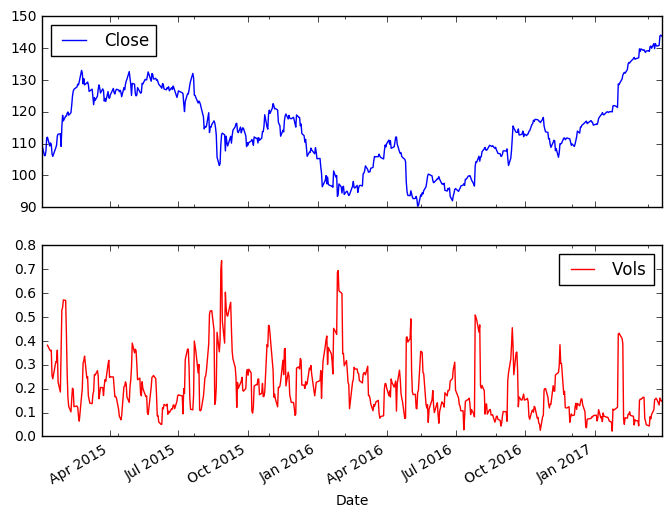

In [67]:
### PLOT PRICES AND VOLATILITIES

aapl[['Close','Vols']].plot(subplots=True,
                            color=('blue','red'),figsize=(8,6))

### Diversification of a Portfolio

It is useful to examine the power of using vector algebra with an application. Here we use vector and summation math to understand how diversification in stock portfolios works. Diversification occurs when we increase the number of non-perfectly correlated stocks in a portfolio, thereby reducing portfolio variance. In order to compute the variance of the portfolio we need to use the portfolio weights ${\bf w}$ and the covariance matrix of stock returns ${\bf R}$, denoted ${\bf \Sigma}$. We first write down the formula for a portfolio's return variance: 

\begin{equation}
Var({\bf w'R}) = {\bf w'\Sigma w} = \sum_{i=1}^n {\bf w_i^2 \sigma_i^2}
+ \sum_{i=1}^n \sum_{j=1,i \neq j}^n {\bf w_i w_j \sigma_{ij}}
\end{equation}

Readers are strongly encouraged to implement this by hand for $n=2$ to convince themselves that the vector form of the expression for variance ${\bf w'\Sigma w}$ is the same thing as the long form on the right-hand side of the equation above. 

### Independent Returns

If returns are independent, then the formula collapses to: 

\begin{equation}
Var(\bf{w'R}) = \bf{w'\Sigma w} = \sum_{i=1}^n {\bf w_i^2 \sigma_i^2}
\end{equation}

### Correlated returns

If returns are dependent, and equal amounts are invested in
each asset ($w_i=1/n,\;\;\forall i$):

\begin{eqnarray*}
Var(\bf{w'R}) &=&  \frac{1}{n}\sum_{i=1}^n \frac{\sigma_i^2}{n}
+ \frac{n-1}{n}\sum_{i=1}^n \sum_{j=1,i \neq j}^n  \frac{\sigma_{ij}}{n(n-1)}\\
&=& \frac{1}{n} \bar{\sigma_i}^2 + \frac{n-1}{n} \bar{\sigma_{ij}}\\
&=& \frac{1}{n} \bar{\sigma_i}^2 + \left(1 - \frac{1}{n} \right) \bar{\sigma_{ij}}
\end{eqnarray*}

### In the limit

The first term is the average variance, denoted $\bar{\sigma_1}^2$ divided by $n$, and the second is the average covariance, denoted $\bar{\sigma_{ij}}$ multiplied by factor $(n-1)/n$. As $n \rightarrow \infty$,

\begin{equation}
Var({\bf w'R}) = \bar{\sigma_{ij}}
\end{equation}

This produces the remarkable result that in a well diversified portfolio, the variances of each stock's return does not matter at all for portfolio risk! Further the risk of the portfolio, i.e., its variance, is nothing but the average of off-diagonal terms in the covariance matrix. 

### Insight from Diversification Math

In [68]:
sd=0.20; cv=0.01; m=100
n = range(1,m+1) 
sd_p = zeros(m)
for j in n:
    cv_mat = matrix(ones((j,j))*cv)
    fill_diagonal(cv_mat,sd**2)
    w = matrix(ones(j)*(1.0/j)).T
    sd_p[j-1] = sqrt((w.T).dot(cv_mat).dot(w))

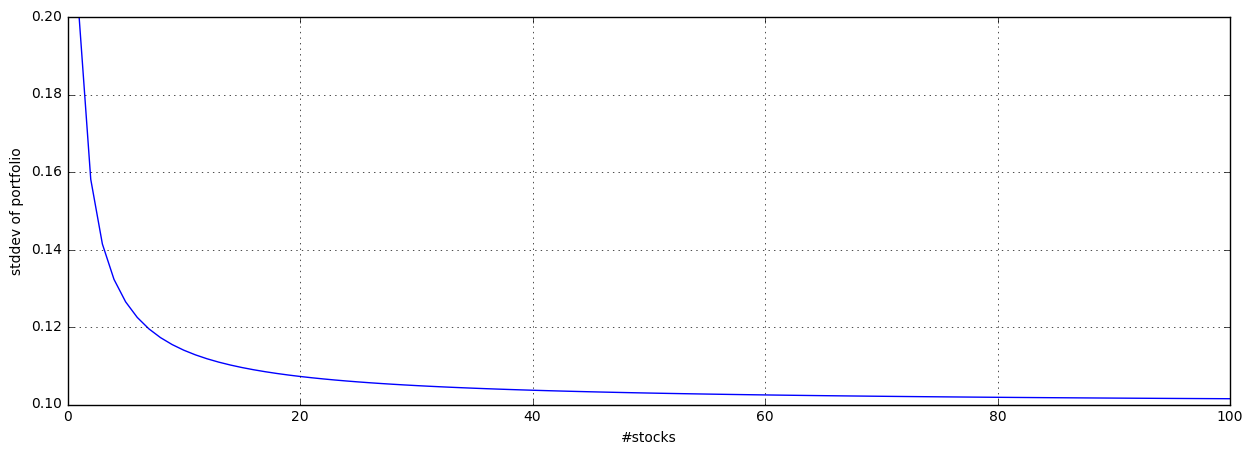

In [69]:
plot(n,sd_p)
xlabel('#stocks')
ylabel('stddev of portfolio')
grid()

### Arithmetic vs Geometric mean returns

The geometric mean is a good indicator of past performance, especially when we are interested in holding period returns. But if we are interested in expected future returns, the arithmetic mean is the relevant statistic.

Suppose a stock will rise by 30% or fall by 20% with equal probability. If it did one each in consecutive years then the geometric mean return is:

In [70]:
g_ret = ((1+0.30)*(1-0.20))**0.5-1
print("Geometric mean return = ", g_ret)

Geometric mean return =  0.01980390271855703


In [71]:
a_ret = 0.5*(0.30+(-0.20))
print("Arithmetic mean return per year = ",a_ret)

Arithmetic mean return per year =  0.04999999999999999


### Which one should you use?

Which one is more realistic in predicting future expected returns over the next two years? Note that there are 4 cases to consider for outcomes, all with equal probability $1/4$. 

In [72]:
ret = zeros(4)
ret[0] = (1+0.3)*(1+0.3)
ret[1] = (1+0.3)*(1-0.2)
ret[2] = (1-0.2)*(1+0.3)
ret[3] = (1-0.2)*(1-0.2)
two_year_return = 0.25*sum(ret)
print("Expected two year return = ", two_year_return-1)
print("Expected two year return (annualized) = ", two_year_return**0.5-1)

Expected two year return =  0.1025
Expected two year return (annualized) =  0.05
